In [447]:
#!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 4.2 MB/s eta 0:00:30
   ---------------------------------------- 1.3/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.1/124.9 MB 4.1 MB/s eta 0:00:31
   - -------------------------------------- 3.1/124.9 MB 4.1 MB/s eta 0:00:30
   - -------------------------------------- 3.9/124.9 MB 4.1 MB/s eta 0:00:30
   - -------------------------------------- 4.7/124.9 MB 4.1 MB/s eta 0:00:30
   - -------------------------------------- 5.5/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 6.3/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 7.1/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 7.9/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 8.7/124.9 MB 4.0 MB/s eta 0:00:29
   --- ------------------------------------ 9.4/124.9 MB 4.0 MB/s eta 0

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [328]:
dataset_path = r"C:\Users\PC\Desktop\flight-dataset"

df =  pd.read_excel(dataset_path + r"\train.xlsx") 
df_train = pd.read_excel(dataset_path + r"\train.xlsx") 
df_test = pd.read_excel(dataset_path + r"\test.xlsx") 

In [329]:
print(df_train.shape)
print(df_test.shape)


(10683, 11)
(2671, 10)


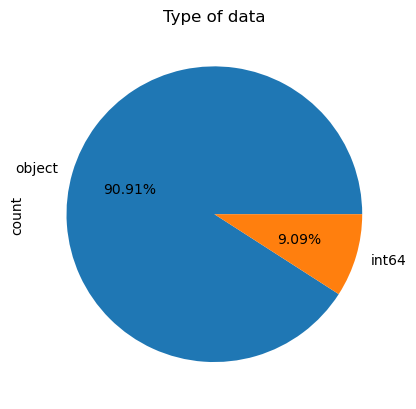

In [330]:
df_train.dtypes.value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Type of data")
plt.show()

In [331]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [332]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [333]:
df_train.dropna(inplace=True , axis=0)

In [334]:
df_train['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [335]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [336]:
df_train.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


### Basic Observations:
1. There are 12 distinct airlines with "Jet Airways" as the most common one
2. Delhi is the most common popular of flight
3. Cochin is the most popular destination of flight
4. Most common route is DEL->BOM->COK

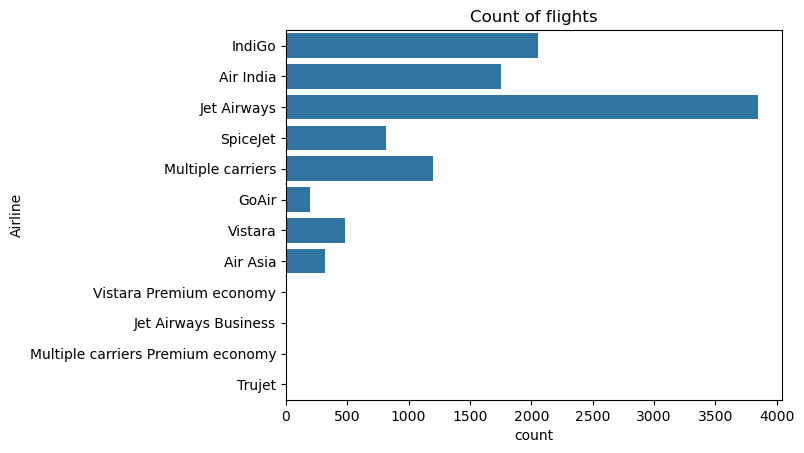

In [338]:
plt.title("Count of flights")
sns.countplot(df_train['Airline'])
plt.show()

In [339]:
airline_counts = df_train.groupby("Airline").size()
airline_percentage = np.round((airline_counts / airline_counts.sum()) * 100 , 2 )
airline_percentage.reset_index(name="Percentage").sort_values(by="Percentage" , ascending=False)

,Airline,Percentage
4,Jet Airways,36.03
3,IndiGo,19.22
1,Air India,16.39
6,Multiple carriers,11.20
8,SpiceJet,7.66
10,Vistara,4.48
0,Air Asia,2.99
2,GoAir,1.82
7,Multiple carriers Premium economy,0.12
5,Jet Airways Business,0.06


In [340]:
df_train['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [341]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [342]:
from sklearn.preprocessing import OneHotEncoder

def preprocess_date_of_flight(df):
    df['day_of_flight'] = df['Date_of_Journey'].apply( lambda x : x.split("/")[0] ).astype(int)
    df['month_of_flight'] = df['Date_of_Journey'].apply( lambda x : x.split("/")[1] ).astype(int)
    df['year_of_flight'] = df['Date_of_Journey'].apply( lambda x : x.split("/")[2] ).astype(int)

    return df

def preprocess_flight_time(df):
    df['Dep_Time'] = df['Dep_Time'].apply( lambda time : (int(time.split(":")[0]) * 60 ) + int(time.split(":")[1]) )
    df['Arrival_Time'] = df['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')
    df['Arrival_Time'] = df['Arrival_Time'].apply( lambda time : (int(time.split(":")[0]) * 60 ) + int(time.split(":")[1]) )
    df[['Duration_hours' , 'Duration_minutes']] = df['Duration'].str.extract(r'(\d+)h?\s*(\d+)?m?')
    df['Duration_minutes'] = df['Duration_minutes'].fillna(0)
    df['Duration'] = df['Duration_hours'].astype(int) * 60 + df['Duration_minutes'].astype(int)
    df.drop(['Duration_hours' , 'Duration_minutes'] , inplace=True , axis=1)
    
    return df

def preprocess_stops(df):
    df['Total_Stops'] = df['Total_Stops'].replace({
        'non-stop' : 0,
        '1 stop' : 1,
        '2 stops': 2,
        '3 stops': 3,
        '4 stops': 4
    })

    return df

In [343]:
df_train = preprocess_date_of_flight(df)
df_train = preprocess_flight_time(df)
df_train = preprocess_stops(df)

C:\Users\PC\AppData\Local\Temp\ipykernel_9064\2434886295.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({


In [344]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_flight,month_of_flight,year_of_flight
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,1340,70,170,0.0,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,795,445,2.0,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,565,265,1140,2.0,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1085,1410,325,1.0,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1010,1295,285,1.0,No info,13302,1,3,2019


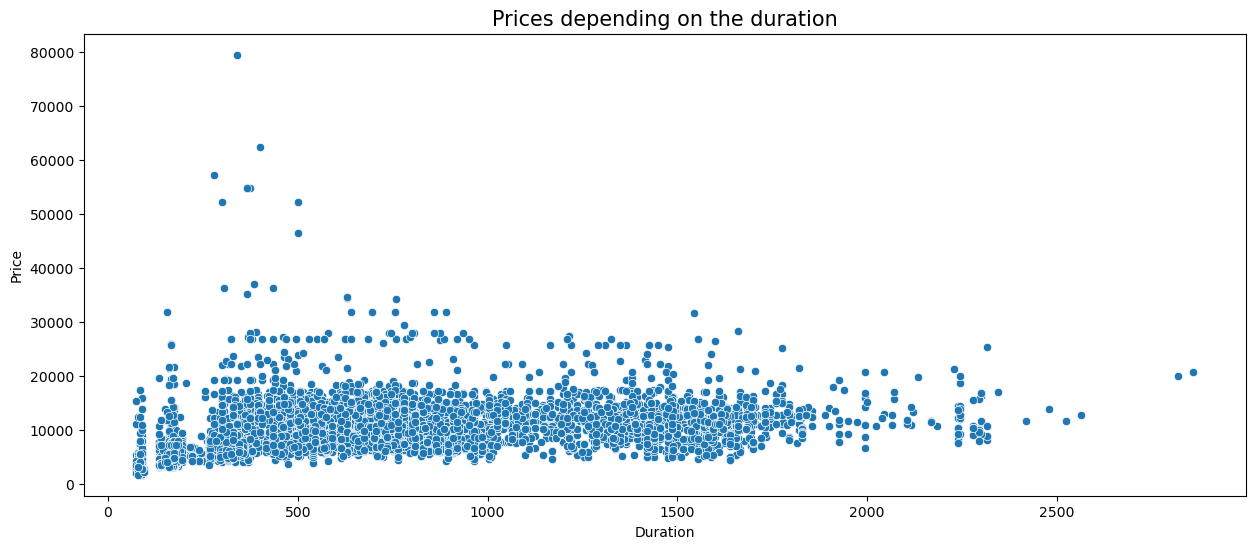

In [345]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration", y="Price", data=df_train).set_title("Prices depending on the duration",fontsize=15)
plt.show()

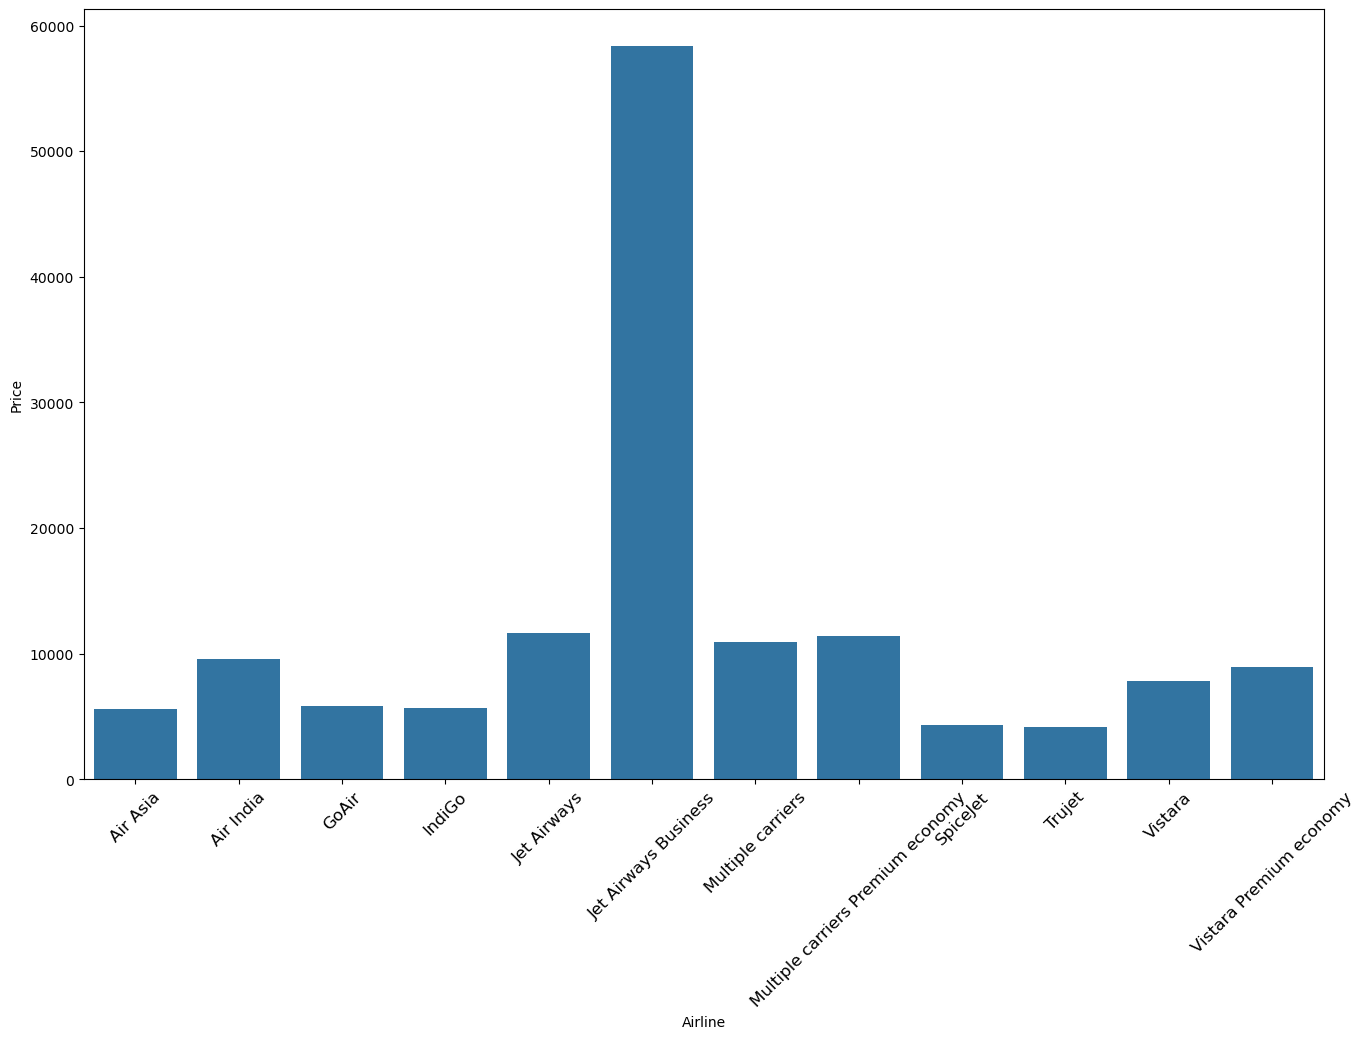

In [346]:
df_temp = df_train.copy()
airline_price_grouped = df_temp.groupby(["Airline"])['Price'].mean(numeric_only=True).reset_index()
plt.figure( figsize=(16,10))
sns.barplot(x='Airline' , y='Price' , data=airline_price_grouped)
plt.xticks(fontsize=12, rotation=45)
plt.show()

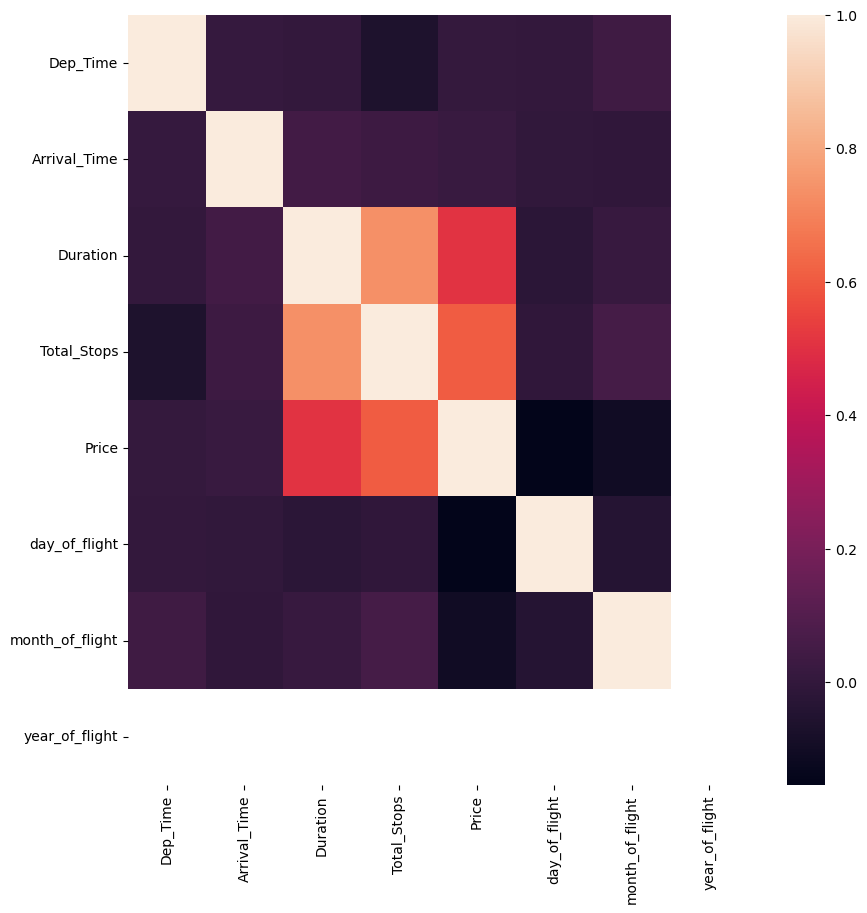

In [347]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train.select_dtypes(include=['number']).corr())
plt.show()


In [349]:
rogue_Nan_index = df_train [ df_train['Total_Stops'].isnull() ].index
df_train.drop(rogue_Nan_index , axis=0 , inplace=True)

In [350]:
y_train = df_train.loc[ :  , 'Price']
df_train.drop(["Date_of_Journey" ,"Route" , "Price"] , inplace=True , axis=1)

In [351]:
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
day_of_flight      0
month_of_flight    0
year_of_flight     0
dtype: int64

In [352]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ('one_hot_encoding' , OneHotEncoder() , ["Source" , "Destination" , "Airline" , "Additional_Info"] )
] , remainder="passthrough")

X_transformed = ct.fit_transform(df_train)

In [353]:
X_transformed

<10682x40 sparse matrix of type '<class 'numpy.float64'>'
	with 114011 stored elements in Compressed Sparse Row format>

In [467]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
models = {}

models["GradientBoostingRegressor"] = GradientBoostingRegressor(n_estimators=150 , learning_rate=0.21 ,random_state=42)
models["LinearRegression"] = LinearRegression()
models["XGBRegressor"] = XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)

In [469]:
def train_models( models ):

    for name , model in models.items():
        score = cross_val_score(model , X_transformed , y_train , cv=5 , scoring="r2")
        print(" R2 score for " , name , " : " , score.mean() )
        print("----------------------------------\n")
    

In [471]:
train_models(models)

 R2 score for  GradientBoostingRegressor  :  0.8590375711380973
----------------------------------

 R2 score for  LinearRegression  :  0.6865694632344379
----------------------------------

 R2 score for  XGBRegressor  :  0.9100239515304566
----------------------------------

